# Project Business Statistics: Axis Insurance



## Problem Statement


Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, the attributes of customers can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

Suppose you are hired as a Data Scientist in an Insurance company. The company wants to have a detailed understanding of the customer base for one of its Insurance Policy 'MediClaim'. The idea is to generate insights about the customers and answer a few key questions with statistical evidence, by using the past dataset. The dataset 'AxisInsurance' contains customers' details like age, sex, charges, etc. Perform the statistical analysis to answer the following questions using the collected data.

1.	Explore the dataset and extract insights using Exploratory Data Analysis.

2.	Prove(or disprove) that the medical claims made by the people who smoke are greater than those who don't?

3.	Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

4.  Does the smoking habit of customers depend on their region?  [Hint: Create a contingency table using the pandas.crosstab() function]

5. Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

The idea behind answering these questions is to help the company in making evidence-based business decisions.

## Assumptions
The Health Insurance Customer's data is a simple random sample from the population data, and the samples are independent of each other.

## Data Dictionary

**AxisInsurance.csv**  contains the following information about customers of the Axis Health Insurance.
1.	Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2.	Sex - This is the policy holder's gender, either male or female.
3.	BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4.	Children - This is an integer indicating the number of children / dependents covered by the insurance plan.
5.	Smoker - This is yes or no depending on whether the insured person regularly smokes tobacco.
6.	Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7.	Charges - Individual medical costs billed by health insurance 

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# library for statistical tests
import scipy.stats as stats

In [2]:
sns.set() #setting the default seaborn style for our plots

## 1.	Explore the dataset and extract insights using Exploratory Data Analysis.

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [3]:
# complete the code below to load the dataset
df = pd.read_csv('AxisInsurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,52,female,46.750,5,no,southeast,12592.53450
1335,54,female,47.410,0,yes,southeast,63770.42801
1336,37,female,47.600,2,yes,southwest,46113.51100


### Data Overview

In [4]:
# view a few rows of the data frame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# view the shape of the data frame
df.shape

(1338, 7)

In [6]:
# check the data types of the columns in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* There are total 1338 non-null observations in each of the columns.

* There are 7 columns named **'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'** whose data types are **int64, object, float64, int64, object, object, float64** respectively.


* sex, smoker and region are objects, we can change them to categories.

### Fixing the data types

`converting "objects" to "category" reduces the space required to store the DataFrame. It also helps in analysis`

In [7]:
df["sex"]=df["sex"].astype("category")
df["smoker"]=df["smoker"].astype("category")
df["region"]=df["region"].astype("category")

### Check for missing values

In [8]:
# It calculates the total number of missing values. There is no any missing values. 
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Five Point Summary

In [9]:
# It calculates the statistical summery of numerical variables
print(df.describe())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.682687     1.094918  13270.422265
std      14.049960     6.145674     1.205493  12110.011237
min      18.000000    14.000000     0.000000   1121.873900
25%      27.000000    26.315000     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.700000     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [10]:
# This helps to calculate the total number of male and female 
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [11]:
# calculate yhe number of people who smoke 
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [12]:
# finding the number of people from the different region
df['region'].value_counts()

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

### Univariate analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Age

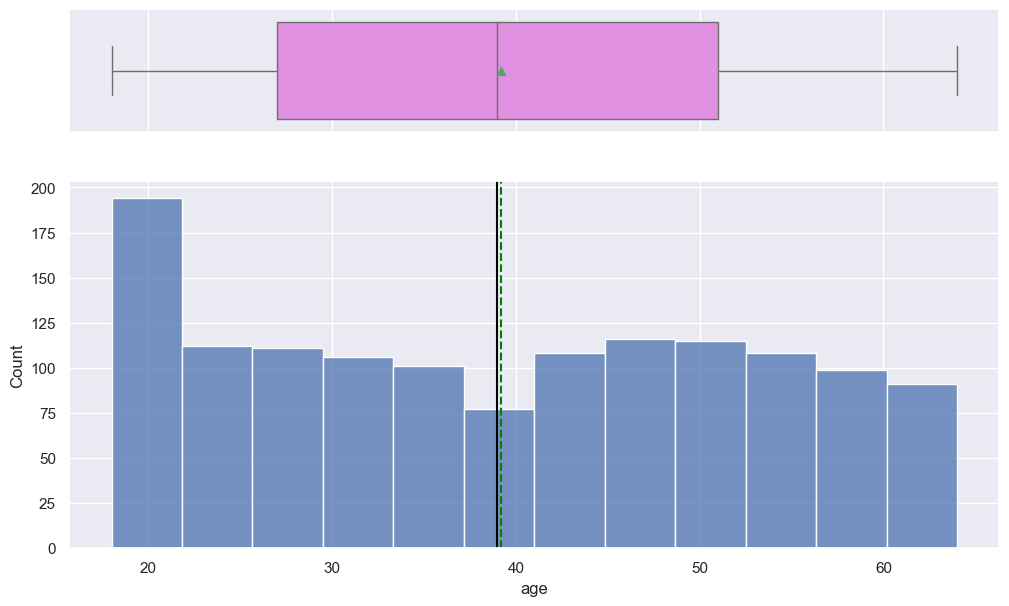

In [14]:
# plotting the distribution of 'age'
histogram_boxplot(df,'age')

#### BMI

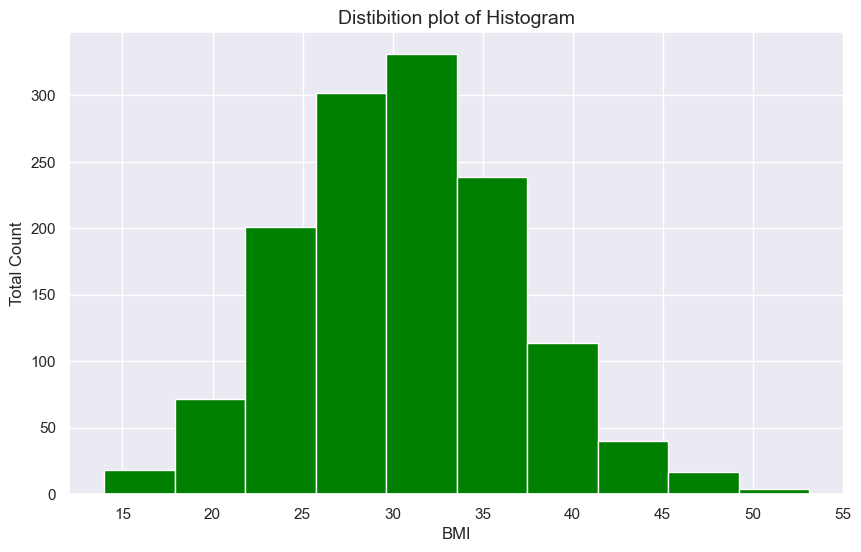

In [15]:
# write the code to plot the distribution of 'bmi' column
plt.figure(figsize=(10,6))
plt.hist(df['bmi'], color = 'green')
plt.xlabel('BMI')
plt.ylabel('Total Count')
plt.title('Distibition plot of Histogram', fontsize = 14)

plt.show()



In [16]:
# from the above histogram, more than 300 people who whave approx 35 BMI and around less than 5 people have approx. 55 BMI

#### Children

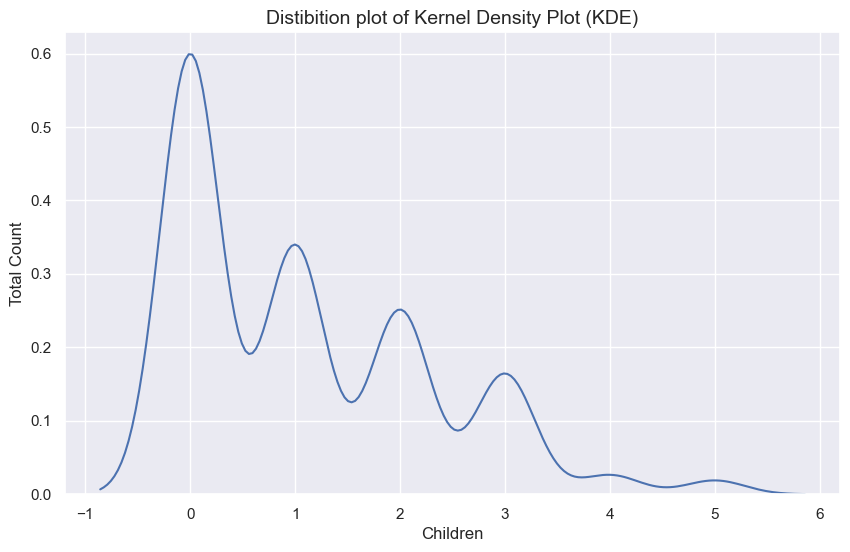

In [17]:
# write the code to plot the distribution of 'children' column
plt.figure(figsize=(10,6))
sns.kdeplot(x = 'children', data = df)
plt.xlabel('Children')
plt.ylabel('Total Count')
plt.title('Distibition plot of Kernel Density Plot (KDE)', fontsize = 14)

plt.show()


* As there are only 5 unique values in children, we can also include it in the barplot of categorical variables.

#### Charges

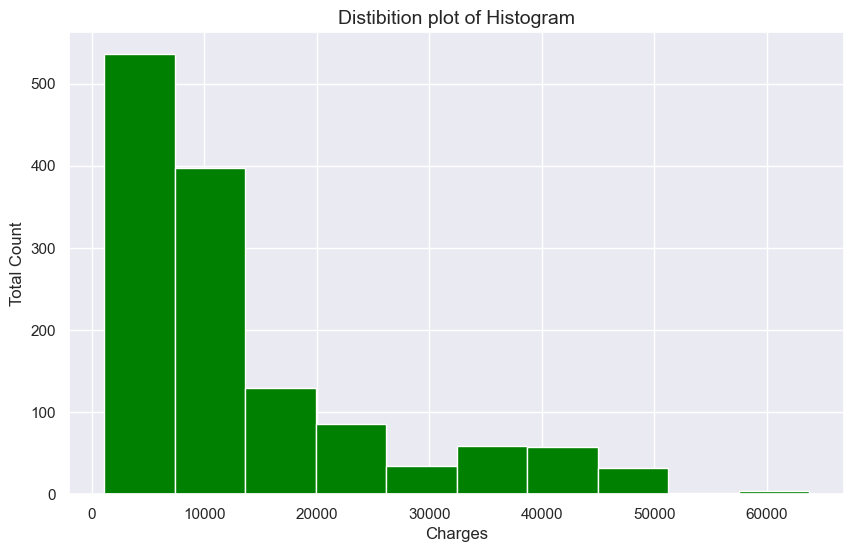

In [18]:
# write the code to plot the distribution of 'charges' column
plt.figure(figsize=(10,6))
plt.hist(df['charges'], color = 'green')
plt.xlabel('Charges')
plt.ylabel('Total Count')
plt.title('Distibition plot of Histogram', fontsize = 14)

plt.show()


In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#### Sex

C:\Users\19195\AppData\Local\Temp\ipykernel_15148\1902798924.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())


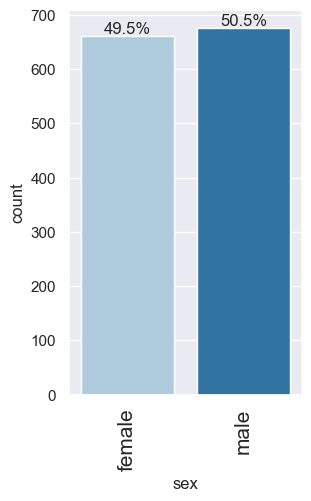

In [20]:
# plotting the barplot of 'children'
labeled_barplot(df, 'sex', perc=True)

#### Children

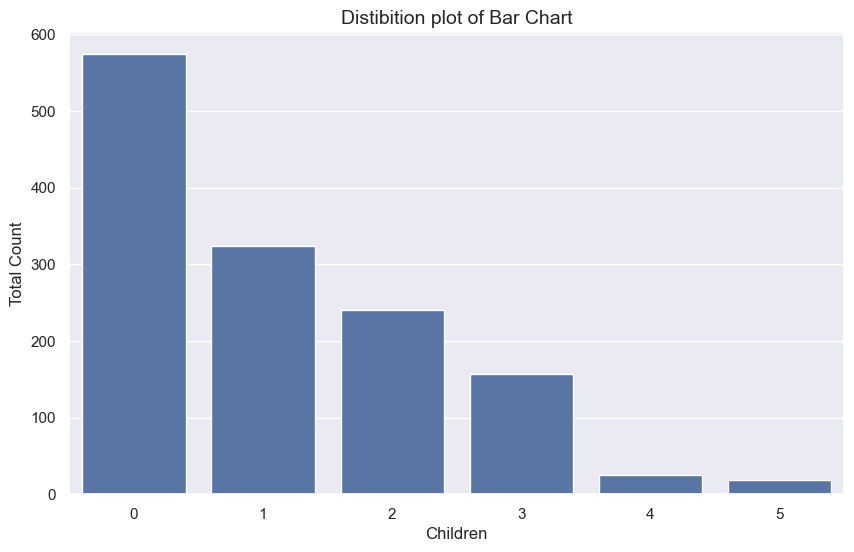

In [21]:
#code to plot the barplot of 'children' column
plt.figure(figsize=(10,6))
sns.countplot(x = 'children', data = df)
plt.xlabel('Children')
plt.ylabel('Total Count')
# plt.legend(title = 'Number of Children')
plt.title('Distibition plot of Bar Chart', fontsize = 14)

plt.show()



In [22]:
# From the above graph, more than 550 people donot have any children and however less than 50 people have 5 children. 

#### Smoker

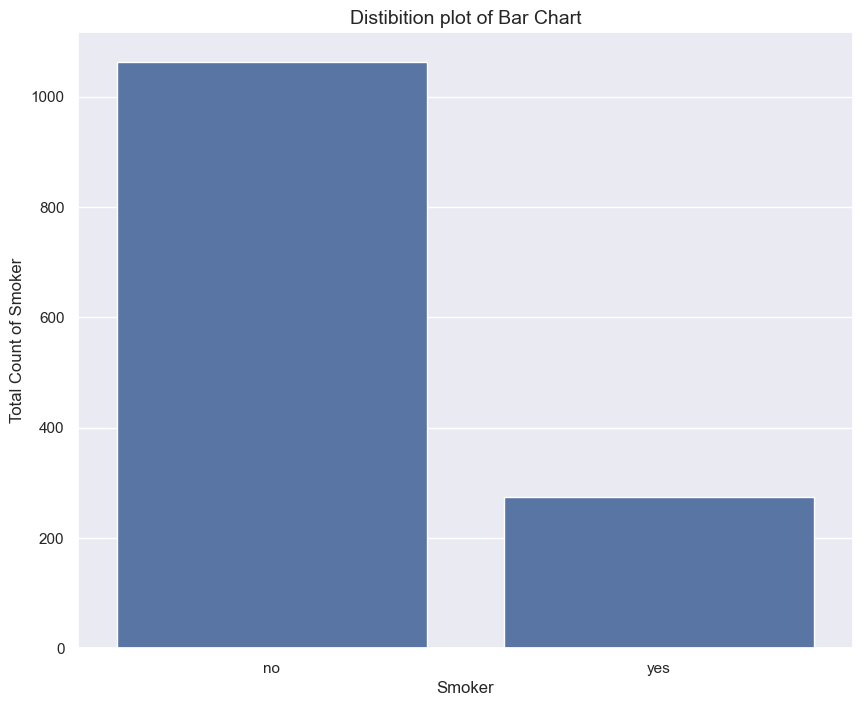

In [23]:
#code to plot the barplot of 'smoker' column
plt.figure(figsize=(10,8))
sns.countplot(x = 'smoker', data = df)
plt.xlabel('Smoker')
plt.ylabel('Total Count of Smoker')
plt.title('Distibition plot of Bar Chart', fontsize = 14)

plt.show()


#### Region

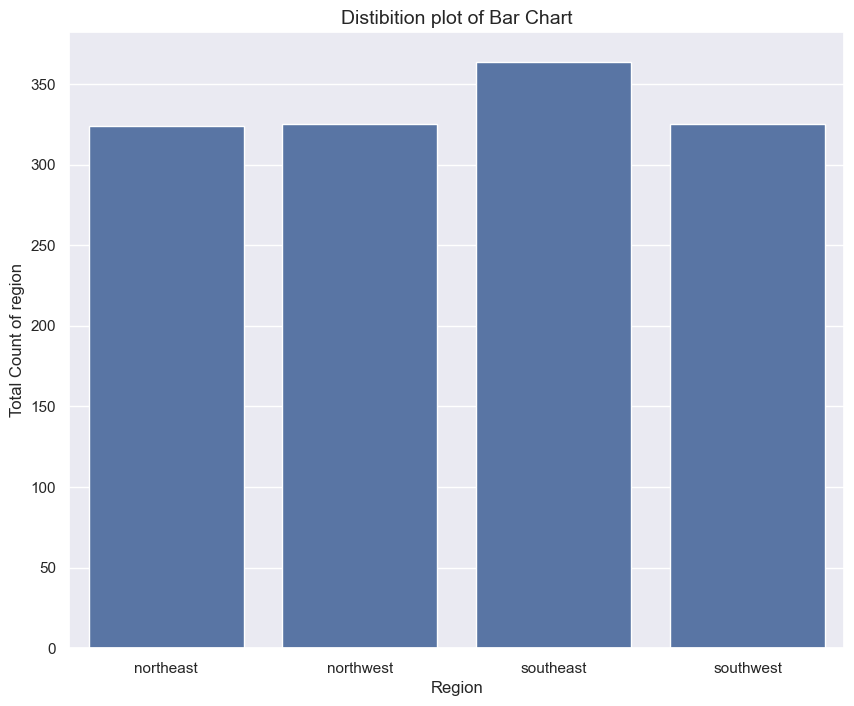

In [24]:
# code to plot the barplot of 'region' column
plt.figure(figsize=(10,8))
sns.countplot(x = 'region', data = df)
plt.xlabel('Region')
plt.ylabel('Total Count of region')
# plt.legend(title='Name of Region', loc = 'right')
plt.title('Distibition plot of Bar Chart', fontsize = 14)

plt.show()



### Bivariate Analysis

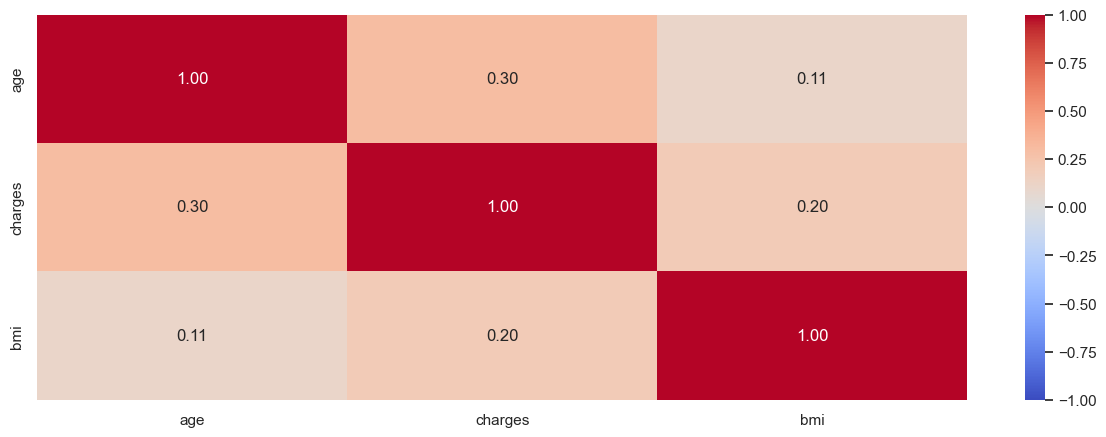

In [25]:
# code to plot the heatmap between the continuous variables
plt.figure(figsize=(15,5))
# List of Continuous Variables 
con_variables = ['age', 'charges', 'bmi']
corr_matrix = df[con_variables].corr()
sns.heatmap(corr_matrix,  annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f') # complete the code
plt.show()


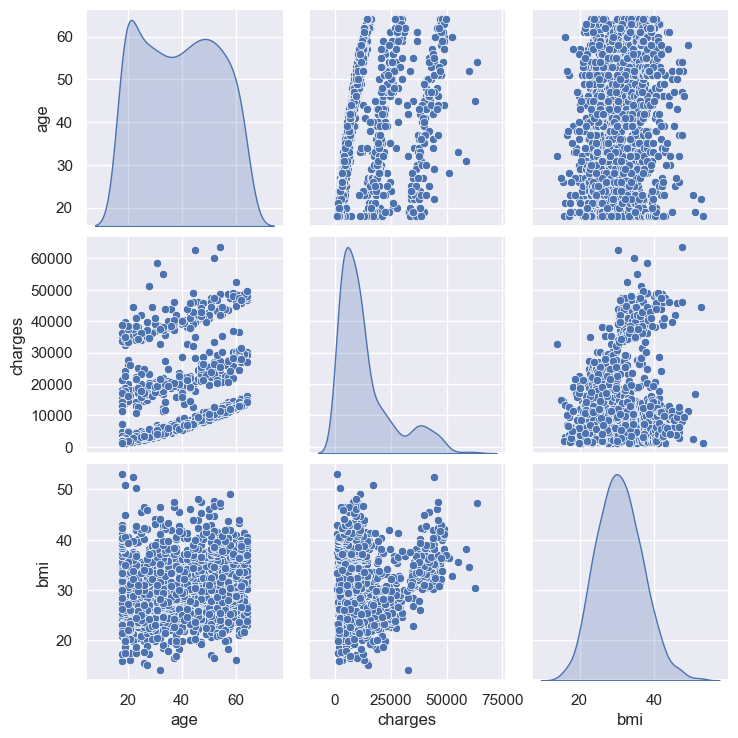

In [26]:
#code to plot the pairplot between all possible attributes' pair
sns.pairplot(df[con_variables],  diag_kind='kde')  # complete the code
plt.show()


## 2. Prove(or disprove)  that the medical claims made by the people who smoke is greater than those who don't? 

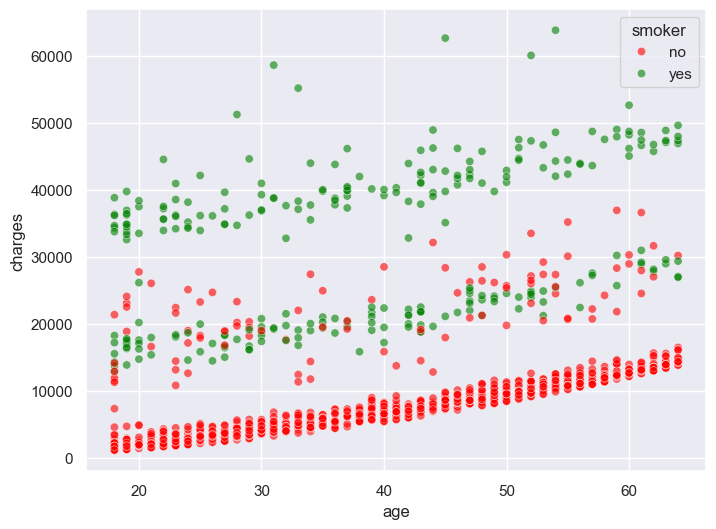

In [27]:
# visual analysis of medical charges for smokers and non-smokers
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'age', y = 'charges', hue='smoker', data = df, palette= ['red','green'] ,alpha=0.6)
plt.show()

### Step 1: Define the null and alternate hypotheses

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, select the appropriate test**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [28]:
# extract the values of charges for smokers
charges_smokers = df[df['smoker'] == 'yes']['charges']

# extract the values of charges for non-smokers
charges_non_smokers = df[df['smoker']=='no']['charges']


In [29]:
print("The sample mean of the charges of smokers is:", round(charges_smokers.mean(),2))
print("The sample mean of the charges of non-smokers:", round(charges_non_smokers.mean(),2))
print('The sample standard deviation of the charges of smokers is:', round(charges_smokers.std(),2))
print('The sample standard deviation of the charges of non-smokers is:', round(charges_non_smokers.std(),2))

The sample mean of the charges of smokers is: 32050.23
The sample mean of the charges of non-smokers: 8434.27
The sample standard deviation of the charges of smokers is: 11541.55
The sample standard deviation of the charges of non-smokers is: 5993.78


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

### Step 5: Calculate the p-value

In [30]:
# complete the code to import the required function
from scipy.stats import stats

# code to calculate the p-value
test_stat, p_value = stats.ttest_ind(charges_smokers, charges_non_smokers)  

print('The p-value is', p_value)

The p-value is 8.271435842177219e-283


C:\Users\19195\AppData\Local\Temp\ipykernel_15148\2117261686.py:5: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  test_stat, p_value = stats.ttest_ind(charges_smokers, charges_non_smokers)


### Step 6: Compare the p-value with $\alpha$

In [31]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 8.271435842177219e-283 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

1. There is relationship between smoker and charges which is clearly proved by the above graph. It means that those people who smoke have been charges more than the people who donot smoke. 

2. Mean of smokers and Non smokers is different which means that there is no relationship  which is proved that alternative hypothesis is passed. 



## 3. Prove (or disprove) with statistical evidence that BMI of females is different from that of males.

### Perform Visual Analysis

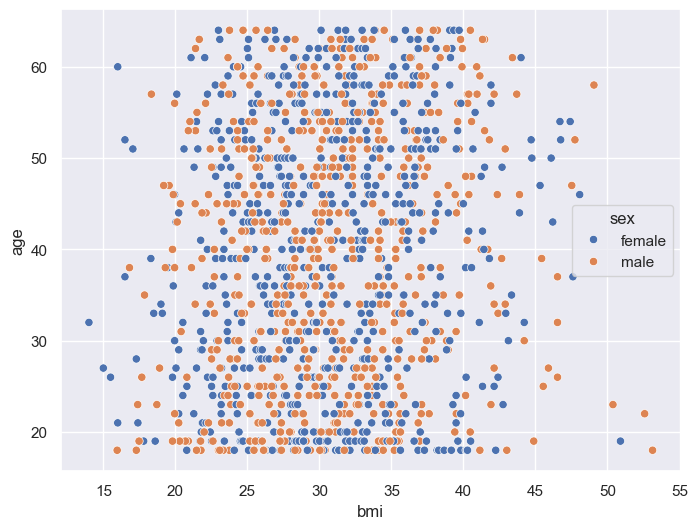

In [32]:
# code to visually compare the BMI of females and males
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'bmi', y = 'age',   hue='sex', data = df,) 
plt.show()


### Step 1: Define the null and alternate hypotheses

Null hypithesis means no realtionship bettwen variables (age and bmi) whereas alternative hypothesis means there is relationship between variables (age and bmi)


### Step 2: Select Appropriate test

This is a two-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, select the appropriate test**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [33]:
# extract the values of BMI for females
bmi_females = df[df['sex'] == 'female']['bmi']
# extract the values of BMI for males
bmi_males = df[df['sex']=='male']['bmi']   #write your code her


In [34]:
print("The sample mean of the BMI's of females is:", round(bmi_females.mean(),2))
print("The sample mean of the BMI's of males is:", round(bmi_males.mean(),2))
print("The sample standard deviation of the BMI's of females is:", round(bmi_females.std(),2))
print("The sample standard deviation of the BMI's of males is:", round(bmi_males.std(),2))

The sample mean of the BMI's of females is: 30.42
The sample mean of the BMI's of males is: 30.94
The sample standard deviation of the BMI's of females is: 6.14
The sample standard deviation of the BMI's of males is: 6.14


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

### Step 5: Calculate the p-value

In [35]:
# complete the code to import the required function
from scipy.stats import stats

# write the code to calculate the p-value
test_stat, p_value =  stats.ttest_ind(bmi_females, bmi_males)  #write your code here

print('The p-value is', p_value)

The p-value is 0.11728314042826014


C:\Users\19195\AppData\Local\Temp\ipykernel_15148\1378507453.py:5: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  test_stat, p_value =  stats.ttest_ind(bmi_females, bmi_males)  #write your code here


### Step 6: Compare the p-value with $\alpha$

In [36]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.11728314042826014 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

According to the p-value , we failed to accept the alternative hypothesis which mean that there is no relation between the variables.  It is proved that statistical evidence of BMI of females is different from that of males.


## 4. Does the smoking habit of customers depend on their region?


### Perform Visual Analysis

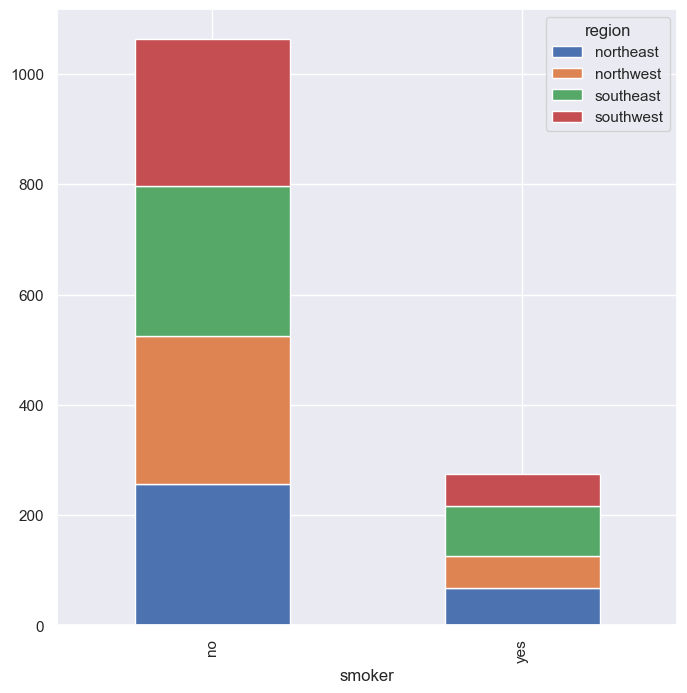

In [37]:
#code to plot a stacked bar plot between 'smoker and 'region'.
pd.crosstab(df['smoker'], df['region']).plot(kind="bar", figsize=(8,8), stacked=True) # complete the code
plt.show()

### Step 1: Define the null and alternate hypotheses

### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - smoker and region. **Based on this information, select the appropriate test.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [48]:
# complete the code to create a contingency table showing the distribution of smokers across regions
contingency_table = pd.crosstab(df['smoker'], df['region'])   

contingency_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


### Step 5: Calculate the p-value

In [39]:
# complete the code to import the required function
from scipy.stats import chi2_contingency

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq =  chi2_contingency(contingency_table) # write your code here

print('The p-value is', p_value)

The p-value is 0.06171954839170547


### Step 6: Compare the p-value with $\alpha$

In [40]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.06171954839170547 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

After determining the P-value, it shows that it is alternative hyphothesis. And yes, it is proved that smoking habit of customers slightly depend on their region. 


## 5.	Is the mean BMI of women with no children, one child and two children the same? Explain your answer with statistical evidence.

### Perform Visual Analysis

In [50]:
# create a new DataFrame for customers who are female and have 0,1, or 2 children
df_new = df[(df['sex']=='female') & (df['children']<3)]
df_new.head()

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.00,1,no,northeast,3167.45585
5,26,female,15.50,2,yes,northeast,14455.64405
6,37,female,16.50,2,no,northeast,6877.98010
7,28,female,17.29,0,no,northeast,3732.62510
9,21,female,17.40,1,no,southwest,2585.26900


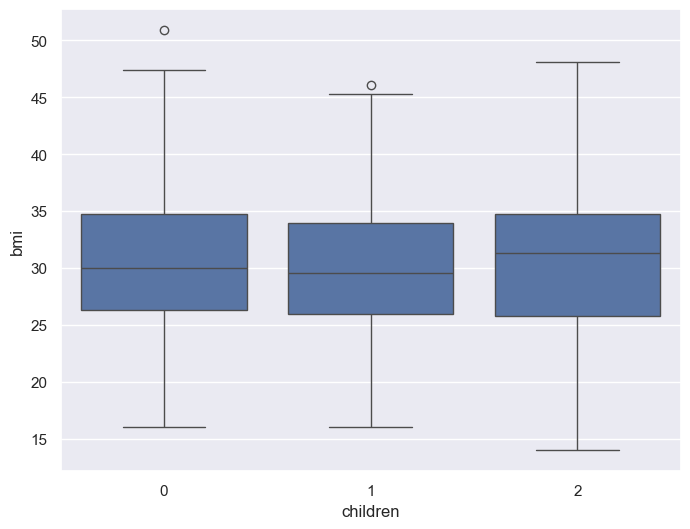

In [42]:
# code to visually plot the BMI of women with 0, 1, and 2 children
plt.figure(figsize=(8,6))
sns.boxplot(x = 'children', y = 'bmi', data = df_new) # complete the code
plt.show()


In [43]:
# code to calculate the mean BMI of women with 0, 1, and 2 children
mean_zero_bmi_women = df_new.groupby('children')['bmi'].mean()
mean_zero_bmi_women

children
0    30.485502
1    30.047500
2    30.572437
Name: bmi, dtype: float64

### Step 1: Analysisng Graph

from the above graph, BMI of women is different according to the number of children. The women having only one child has less BMI than others. On contrast, the women with no children have different variation in the BMI which ranges between 16 to 52 whihc is peetty usual than others. 


### Step 2: Select Appropriate test

This is a problem, concerning three population means. **Based on this information, select the appropriate test to compare the three population means.** Also, check the assumptions of normality and equality of variance for the three groups

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ BMI of women follows a normal distribution

against the alternative hypothesis

>$H_a:$ BMI of women does not follow a normal distribution

In [45]:
# Assumption 1: Normality
# use Shapiro function for the test
import scipy.stats as stats
# find the p-value
w, p_value = stats.shapiro(df_new['bmi'])
print('The p-value is', p_value)

The p-value is 0.20667335391044617


Since p-value of the test is very larger than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [46]:
#Assumption 2: Homogeneity of Variance
# use the levene function for this test

# find the p-value
statistic, p_value = stats.levene(df_new[df_new['children']==0]['bmi'], 
                             df_new[df_new['children']==1]['bmi'], 
                             df_new[df_new['children']==2]['bmi'])

print('The p-value is', p_value)

The p-value is 0.33762398820932993


Since the p-value is larger than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# extract the values of BMI of women with 0 children 
bmi_women_zero = df_new[df_new['children']==0]['bmi']
# extract the values of BMI of women with 0 children 
bmi_women_one =  df_new[df_new['children']==1]['bmi']  # write your code here
# extract the values of BMI of women with 0 children 
bmi_women_two = df_new[df_new['children']==2]['bmi']   # write your code here


### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from scipy.stats import ttest_ind

# write the code to calculate the p-value
test_stat, p_value =ttest_ind( bmi_women_one, bmi_women_two)    # write your code here

print('The p-value is', p_value)

### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

### Step 7:  Draw inference

## Conclusion and Business Recommendations

From the above analysis, there are more number of male population than female and the BMI of male and female is different. Similarly, the number of non-smoker is higher than the smoker and the majority of smoker lived in southeast region.  
In addition, smoker are charged higher insurance price than the non smoker. 
